In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train[0].shape

(28, 28)

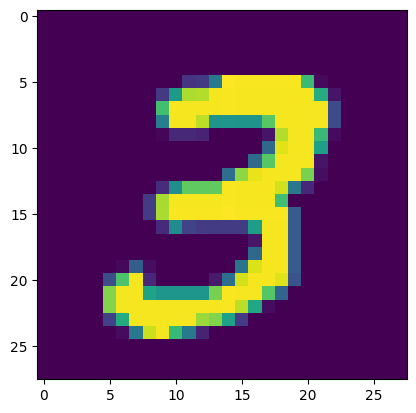

In [ ]:
plt.imshow(X_train[7])

In [ ]:
X_train = X_train/255
X_test  = X_test /255

In [ ]:
X_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32,  activation='relu'))
model.add(Dense(10,  activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics='accuracy')

In [ ]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.1935 - val_accuracy: 0.9684
Epoch 2/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.1713 - val_accuracy: 0.9710
Epoch 3/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.1973 - val_accuracy: 0.9678
Epoch 4/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.1834 - val_accuracy: 0.9691
Epoch 5/25
1500/1500 [==============================] - 5s 3ms/step - loss: 8.9512e-04 - accuracy: 1.0000 - val_loss: 0.1745 - val_accuracy: 0.9717
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.1853 - val_accuracy: 0.9719
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 8.2343e-04 - accuracy: 1.0000 - val_loss: 0.1795 - val_a

In [ ]:
y_prob = model.predict(X_test)
y_prob

313/313 [==============================] - 1s 2ms/step


array([[1.2223813e-17, 1.9081311e-18, 7.4243773e-14, ..., 1.0000000e+00,
        2.8619225e-17, 3.1195454e-12],
       [1.2121434e-23, 9.6214807e-11, 1.0000000e+00, ..., 2.8525938e-31,
        4.3879822e-13, 0.0000000e+00],
       [2.2153389e-14, 9.9999475e-01, 2.9215207e-07, ..., 4.7519242e-09,
        5.0310014e-06, 3.9105779e-13],
       ...,
       [1.8142766e-32, 7.5621624e-26, 6.2061366e-30, ..., 2.3542804e-12,
        1.4050061e-16, 1.4071739e-11],
       [1.2006492e-28, 3.3325666e-23, 1.9494199e-34, ..., 9.2746913e-26,
        8.4167508e-12, 3.6964834e-20],
       [1.7188173e-17, 7.9340967e-25, 5.6230077e-17, ..., 0.0000000e+00,
        2.9232809e-18, 7.1408680e-25]], dtype=float32)

In [ ]:
y_pred = y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9709

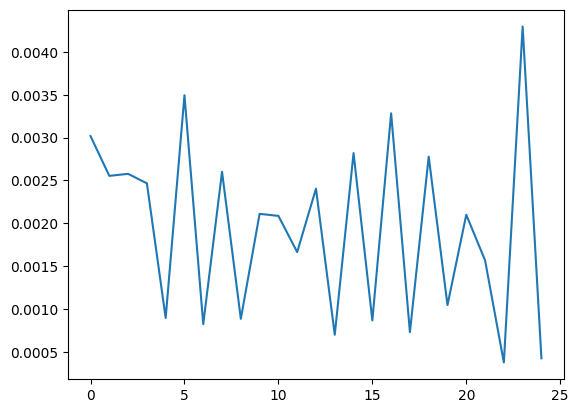

In [ ]:
plt.plot(history.history['loss'])

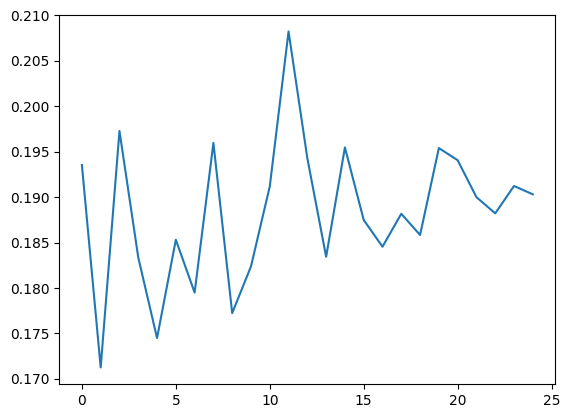

In [ ]:
plt.plot(history.history['val_loss'])

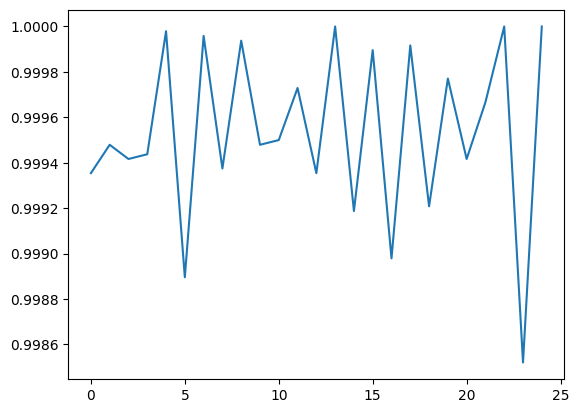

In [ ]:
plt.plot(history.history['accuracy'])

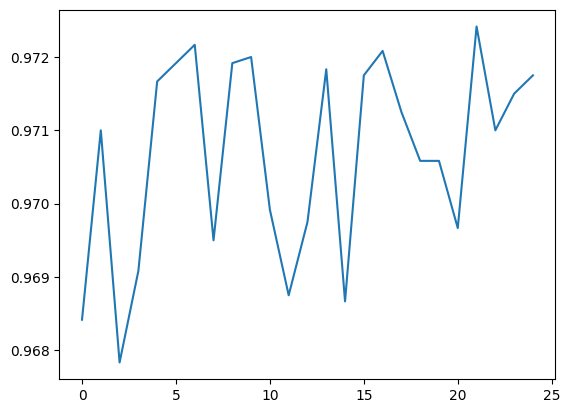

In [ ]:
plt.plot(history.history['val_accuracy'])

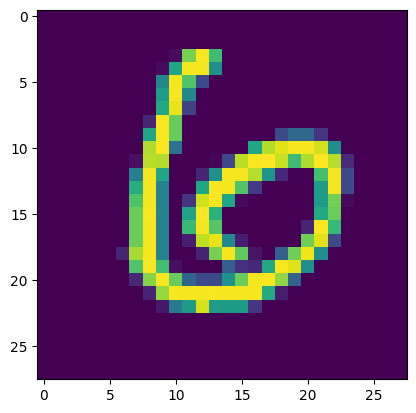

In [ ]:
plt.imshow(X_test[11])

In [ ]:
model.predict(X_test[11].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 28ms/step


array([6])